In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import glob
from pylab import *
import matplotlib
import scipy.stats as stats

%matplotlib inline


In [2]:
filenames=sorted(glob.glob('*08.csv')) #filenames of all spectra
filenames

data = [pd.read_csv(filename,delimiter=';',skiprows=2,header=None) for filename in filenames] #read csv

In [3]:
for i in range(1,len(data)):
    data[i].iloc[:,1:]=data[i].iloc[:,1:]*2 #double all absorbances (dilution 2:1)

In [4]:
da=[np.array(d) for d in data] #to array

In [5]:
#replace values 19 and 21 with 20 (2 of 3 experiments did not work)
for i in range(len(da)):
    da[i][:,19]=da[i][:,20]
    da[i][:,21]=da[i][:,20]

In [6]:
#mean of biological triplicates
new_t=np.copy(da)

for x in range(len(new_t)):
    y=0
    while y < len(new_t[0]):
        z=1
        while z< len(new_t[0][0]):
            new_t[x,y,z:z+3]=new_t[x,y,z:z+3].sum()/len(new_t[x,y,z:z+3])
            z+=3
        y+=1
        
new_t=new_t[:,:,::3]

In [7]:
#normalize to OD750
new=np.copy(new_t)
for x in new:
    for i in range(1,len(new[0][0])):
        x[:,i]=x[:,i]-(x[:,i][x[:,0]==750])

In [8]:
#normalize to chlorophyll maximum
new_m=np.copy(new)
for x in new_m:
    for i in range(1,len(new_m[0][0])):
        x[:,i]=x[:,i]/(x[:,i][x[:,0]==443])

In [9]:
#normalize to integral
new_i=np.copy(new)
for x in new_i:
    for i in range(1,len(new_i[0][0])):
        x[:,i]=x[:,i]/(x[:,i].sum())

In [10]:
#styles
sym=['v','D','x',"o","^",'+',"*"]
size=[50,30,60,40,50,70,80]
labeli=['$\Delta shc$_EVC',
 '$\Delta shc$_SQS1',
 'GT-V_EVC',
 'GT-V_SQS',
 'GT-U_EVC',
 'GT-U_SQS',
 '$\Delta shc$_SQS2']
c=['r','r','b','b','k','k','g']
ls=['--','-','--','-','--','-','-']
lines=[Line2D(range(10), range(10), linestyle='--',color='r'),
        Line2D(range(10), range(10), linestyle='-', color='r'),
        Line2D(range(10), range(10), linestyle='--', color='b'),
        Line2D(range(10), range(10), linestyle='-', color='b'),
        Line2D(range(10), range(10), linestyle='--', color='k'),
        Line2D(range(10), range(10), linestyle='-', color='k'),
        Line2D(range(10), range(10), linestyle='-', color='g')]

labels=['wavelength','dshc_evc','dshc_sqs1','v_evc','v_sqs','u_evc','u_sqs','dshc_sqs2'] 

# Spectra

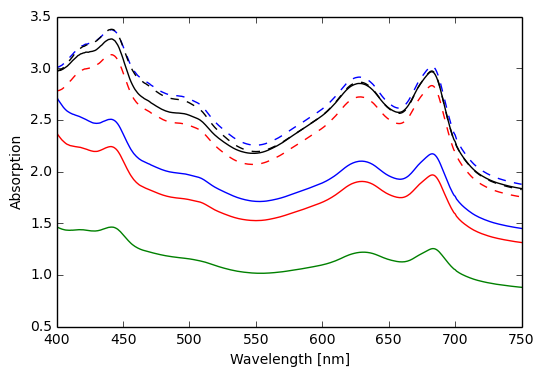

In [11]:
#overview

for i in range(1,len(new_t[0][0])):
    plt.plot(new_t[0][:,0],new_t[13][:,i],label=labels[i],color=c[i-1],ls=ls[i-1])

plt.xlabel('Wavelength [nm]')
plt.ylabel('Absorption')
#plt.legend(loc='best')

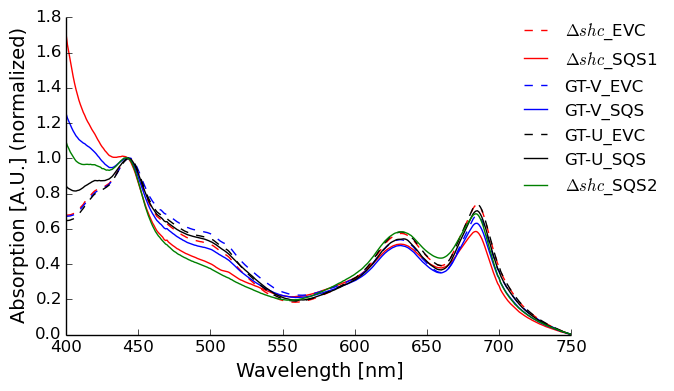

In [12]:
ax = plt.subplot(111)

for i in range(1,len(new_m[0][0])):
    plot(new_m[0][:,0],new_m[0][:,i],label=labels[i],color=c[i-1],ls=ls[i-1]) #plot normalized (max chl)
                                                                              #absorbances day 0
    
#format plot
xlabel('Wavelength [nm]',fontsize=14)
ylabel('Absorption [A.U.] (normalized)',fontsize=14)
plt.tight_layout()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

yticks(fontsize=12)
xticks(fontsize=12)

legend(lines,labeli,bbox_to_anchor=(1.2,1.035),fontsize=12,frameon=False)
#savefig('spectra_day0_all_averaged',bbox_inches='tight',dpi=1000)


(0, 1.8)

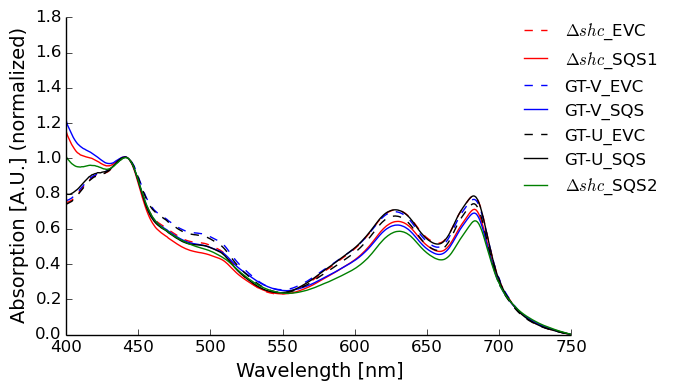

In [13]:
ax = plt.subplot(111)

for i in range(1,len(new_m[0][0])):
    plot(new_m[0][:,0],new_m[13][:,i],label=labels[i],color=c[i-1],ls=ls[i-1]) #plot normalized (to max chl) 
                                                                               #absorbances day 13

#format plot
xlabel('Wavelength [nm]',fontsize=14)
ylabel('Absorption [A.U.] (normalized)',fontsize=14)
plt.tight_layout()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

yticks(fontsize=12)
xticks(fontsize=12)

legend(lines,labeli,bbox_to_anchor=(1.2,1.035),fontsize=12,frameon=False)
plt.ylim(0,1.8)

#savefig('spectra_day13_all_averaged',bbox_inches='tight',dpi=1000)


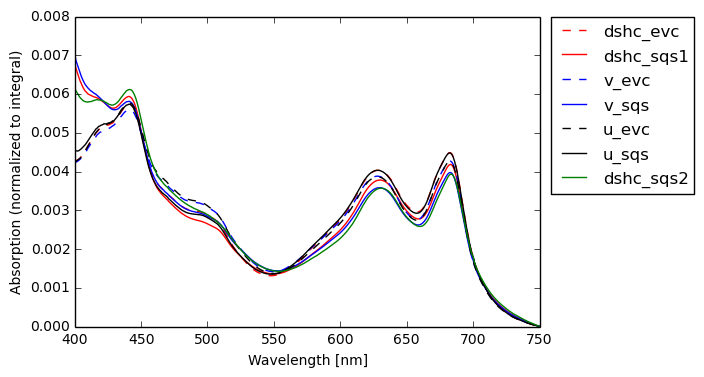

In [14]:
for i in range(1,len(new_i[0][0])):
    plt.plot(new_i[0][:,0],new_i[13][:,i],label=labels[i],color=c[i-1],ls=ls[i-1])  #plot normalized (to integral) 
                                                                                    #absorbances day 13

    
plt.xlabel('Wavelength [nm]')
plt.ylabel('Absorption (normalized to integral)')
legend(bbox_to_anchor=(1.35, 1.025),fontsize=12)
#savefig('spectra_day10_all_averaged_integral',bbox_inches='tight',dpi=1000)
#plt.ylim(0.5,1.15)


In [15]:
#styles
c=('y ')+('r ')+('b ')+('r ')+('k ')+('r ')+('r ')
c=c.split()
ls=('- '*7)
ls=ls.split()

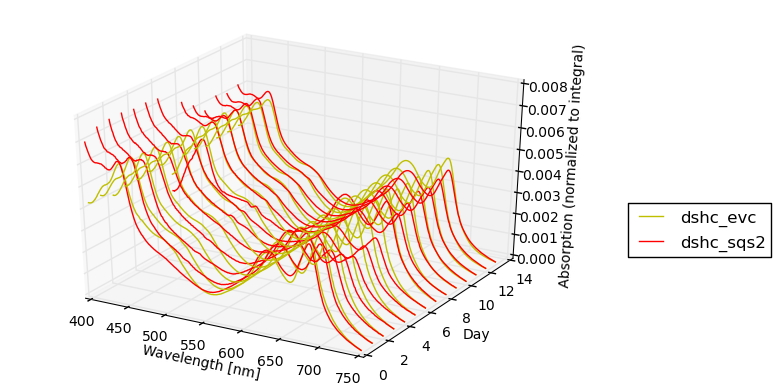

In [16]:
#3D spectra for all days delta shc2
specs=[]
[specs.append(new_i[i]) for i in range(len(new_i))]

fig = plt.figure()
ax = plt.axes(projection='3d')
x=0


while x<len(new):
    for i in range(1,2):
        ax.plot(specs[x][:,0],[x]*len(specs[x][:,i]),specs[x][:,i],label=labels[i-1],color=c[i-1],ls=ls[i-1])
    for i in range(7,8):
        ax.plot(specs[x][:,0],[x]*len(specs[x][:,i]),specs[x][:,i],label=labels[i-1],color=c[i-1],ls=ls[i-1])
    x+=1
    
#plt.legend(loc='best')
#plt.ylim(0.8,2.15)
plt.xlabel('Wavelength [nm]')
ylabel('Day')
#plt.ylabel('Absorption (normalized to OD750)')
ax.set_zlabel('Absorption (normalized to integral)')
legend(['dshc_evc','dshc_sqs2'],bbox_to_anchor=(1.35,0.5),fontsize=12)
#savefig('spectra_averaged_dshc2_3d',bbox_inches='tight')
plt.tight_layout()
plt.show()

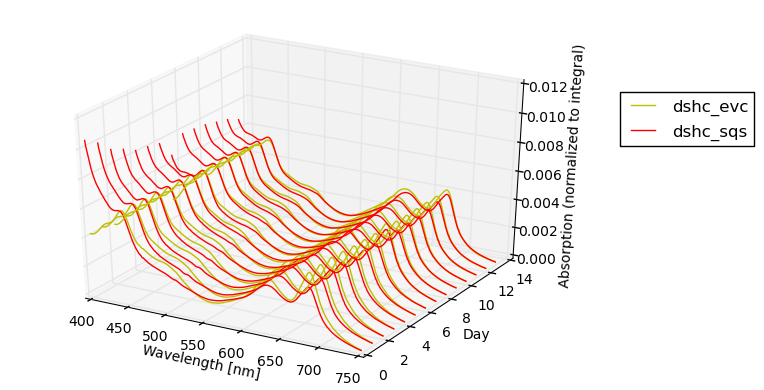

In [17]:
#3D spectra for all days delta shc1
specs=[]
[specs.append(new_i[i]) for i in range(len(new_i))]

fig = plt.figure()
ax = plt.axes(projection='3d')
x=0

while x<len(new):
    for i in range(1,3):
        ax.plot(specs[x][:,0],[x]*len(specs[x][:,i]),specs[x][:,i],label=labels[i-1],color=c[i-1],ls=ls[i-1])
    #for i in range(19,22):
      #  ax.plot(specs[x][:,0],[x]*len(specs[x][:,i]),specs[x][:,i],label=labels[i-1],color=c[i-1])
    x+=1
    
#plt.legend(loc='best')
#plt.ylim(0.8,2.15)
plt.xlabel('Wavelength [nm]')
ylabel('Day')
#plt.ylabel('Absorption (normalized to OD750)')
ax.set_zlabel('Absorption (normalized to integral)')
legend(['dshc_evc','dshc_sqs'],bbox_to_anchor=(1.32,0.8),fontsize=12)
#savefig('spectra_averaged_dshc_3d',bbox_inches='tight')
plt.tight_layout()
plt.show()

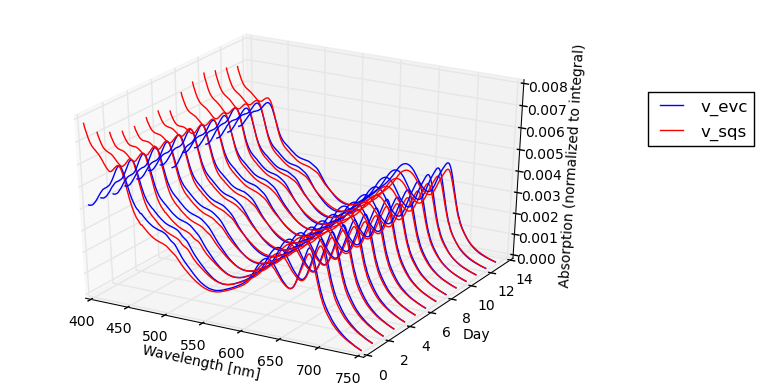

In [18]:
#3D spectra for all days GT-V
specs=[]
[specs.append(new_i[i]) for i in range(len(new_i))]

fig = plt.figure()
ax = plt.axes(projection='3d')
x=0

while x<len(new):
    for i in range(3,5):
        ax.plot(specs[x][:,0],[x]*len(specs[x][:,i]),specs[x][:,i],label=labels[i-1],color=c[i-1],ls=ls[i-1])
    #for i in range(19,22):
      #  ax.plot(specs[x][:,0],[x]*len(specs[x][:,i]),specs[x][:,i],label=labels[i-1],color=c[i-1])
    x+=1
    
#plt.legend(loc='best')
#plt.ylim(0.8,2.15)
plt.xlabel('Wavelength [nm]')
ylabel('Day')
#plt.ylabel('Absorption (normalized to OD750)')
ax.set_zlabel('Absorption (normalized to integral)')
legend(['v_evc','v_sqs'],bbox_to_anchor=(1.32,0.8),fontsize=12)
#savefig('spectra_averaged_vermaas_3d',bbox_inches='tight')
plt.tight_layout()
plt.show()

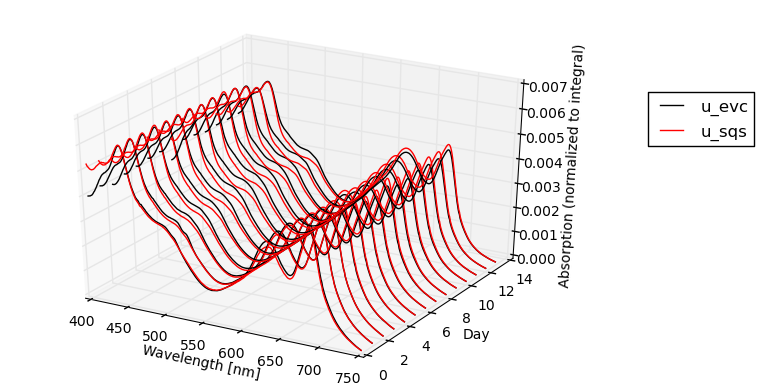

In [19]:
#3D spectra for all days GT-U
specs=[]
[specs.append(new_i[i]) for i in range(len(new_i))]

fig = plt.figure()
ax = plt.axes(projection='3d')
x=0

while x<len(new):
    for i in range(5,7):
        ax.plot(specs[x][:,0],[x]*len(specs[x][:,i]),specs[x][:,i],label=labels[i-1],color=c[i-1],ls=ls[i-1])
    #for i in range(19,22):
      #  ax.plot(specs[x][:,0],[x]*len(specs[x][:,i]),specs[x][:,i],label=labels[i-1],color=c[i-1])
    x+=1
    
#plt.legend(loc='best')
#plt.ylim(0.8,2.15)
plt.xlabel('Wavelength [nm]')
ylabel('Day')
#plt.ylabel('Absorption (normalized to OD750)')
ax.set_zlabel('Absorption (normalized to integral)')
legend(['u_evc','u_sqs'],bbox_to_anchor=(1.32,0.8),fontsize=12)
#savefig('spectra_averaged_uppsala_3d',bbox_inches='tight')
plt.tight_layout()
plt.show()

In [20]:
#new style
c=['r','r','b','b','k','k','g']
ls=['--','-','--','-','--','-','-']

# Growth Rates

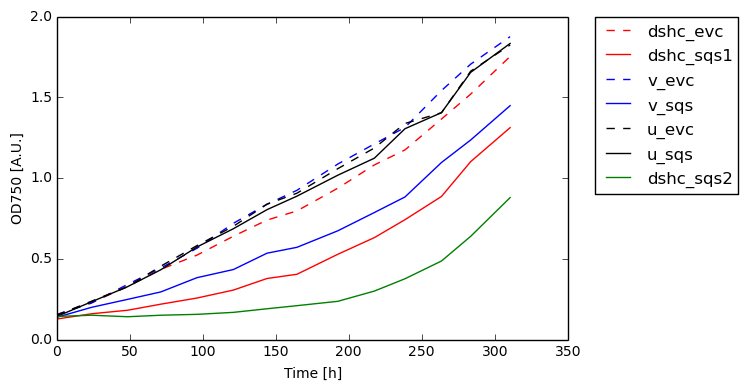

In [21]:
#growth over time (not normalized)
x=[]

for i in new_t:
    x.append(i[i[:,0]==750]) #append OD750 for every strain and day, respectively

x=np.vstack(x).T

#t 1)14:00 2)14:00 3)14:30 4)13:15 5)14:00 6)15:00 7)14:00 8)10:30 9)14.30 10)15:30 11)12.30 12)13.30 13)10.30 14)13.30
t=[0,24.,48.5, 71.25, 96.,121.,144,164.5,192.5,217.5,238.5,263.5,283.5,310.5]

for i in range(0,7):
    plt.plot(t,x[1:][i],label=labels[i+1],color=c[i],ls=ls[i])                                      

plt.xlabel('Time [h]')
plt.ylabel('OD750 [A.U.]')
plt.tight_layout()
    
plt.legend(bbox_to_anchor=(1.35,1.025))
            
#savefig('growth',bbox_inches='tight')
plt.show()


In [22]:
#means and std of triplicates

mimi=[]

for i in da:
    mimi.append(i[i[:,0]==750])
    err=zeros((len(mimi),7))
    
ods=np.copy(mimi)

for x in range(len(ods)):
    y=0
    z=1
    while z< len(mimi[0][0]):
        while y<7:
            ods[x][0][z:z+3]=mimi[x][0][z:z+3].sum()/len(mimi[x][0][z:z+3])
            err[x,y]=np.log(mimi[x][0][z:z+3]).std()
            y+=1
            z+=3
            

od=[]
for x in range(len(ods)):
    od.append(ods[x][0][::3])
    

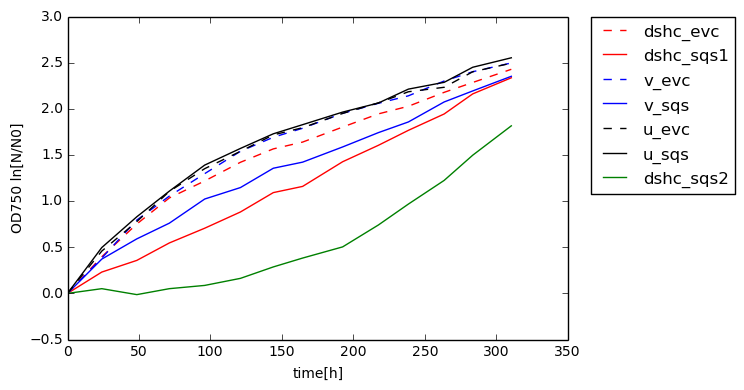

In [23]:
#logarithmic growth all strains

foo=np.vstack(od)
foo=[foo[:,i]/foo[:,i][0] for i in range(len(foo[0]))]
foo=np.log(foo)


#t 1)14:00 2)14:00 3)14:30 4)13:15 5)14:00 6)15:00 7)14:00 8)10:30 9)14.30 10)15:30 11)12.30 12)13.30 13)10.30 14)13.30
t=[0,24.,48.5, 71.25, 96.,121.,144,164.5,192.5,217.5,238.5,263.5,283.5,310.5]

#for i in range(len(x)):
for i in range(0,7):
    plt.plot(t,foo[1:][i],label=labels[i+1],color=c[i],ls=ls[i])
#for i in range(6,7):
#    plt.plot(t,foo[1:][i],label=labels[i+1],color=c[i])
    
plt.xlabel('time[h]')
plt.ylabel('OD750 ln[N/N0]')
plt.tight_layout()
#plt.savefig('delta_shc_ox_sqs_spectra2.png')
#legend(custom_lines,['u_evc','u_sqs'],fontsize=12)
    
plt.legend(bbox_to_anchor=(1.35,1.025))
            
#savefig('growth_curve_all_averaged',bbox_inches='tight')
plt.show()

# Fitting bacterial growth with Gompertz equation

In [24]:
tm=[x/24 for x in t] #time in hours

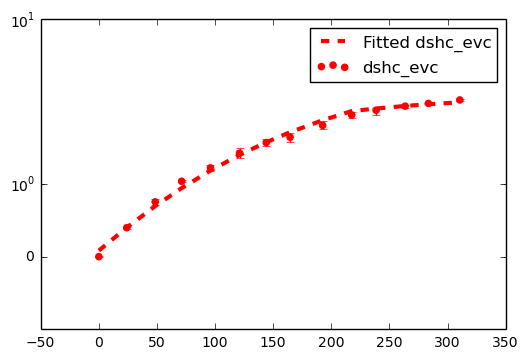

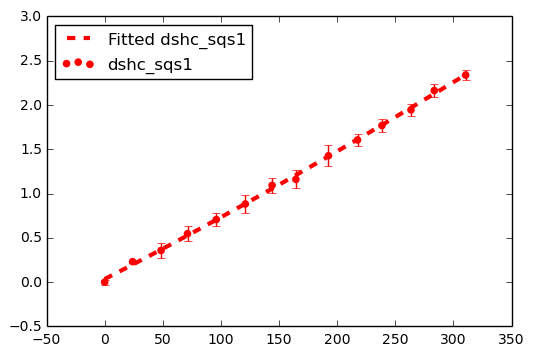

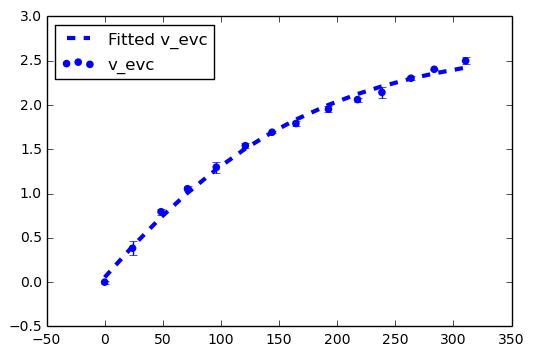

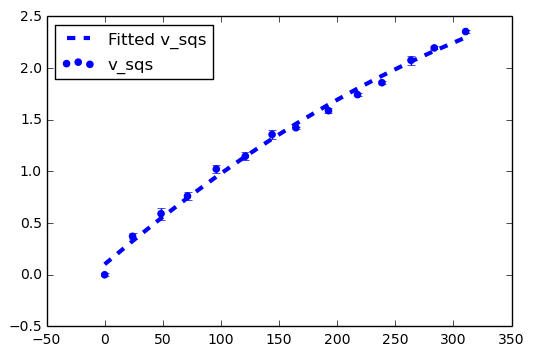

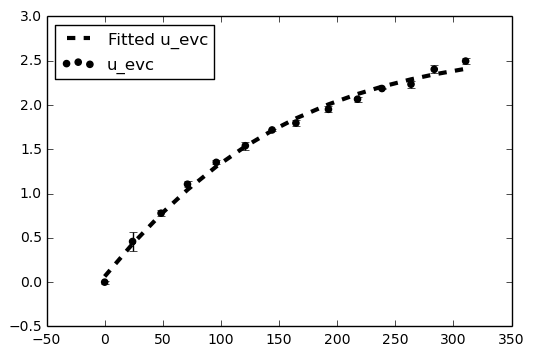

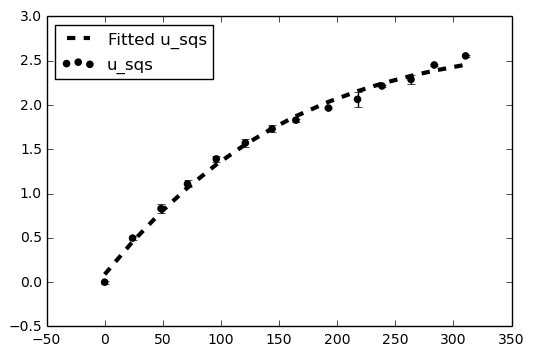

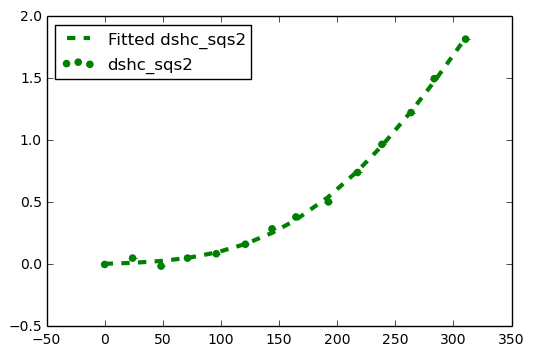

[41.487720057904717, 83.980241470505447, 43.873778744021145, 65.286309732059152, 36.431742672008461, 33.772856643302156, 48.260516176439126]


In [25]:
import scipy as sc
from scipy import optimize

#function to calculate residuals
x0=np.array([5,0.01,1])
def residuals(x,y,t,C):
    return y - test_func(t,x,C)
  
#fit function
def test_func(t,x,C):
    return (x[0] * np.exp(-np.exp(x[1]*np.exp(1)*((x[2]-t)/x[0])+1))) + C #gompertz equation with vertical offset
    #return (x[0] / (1+ np.exp(4*x[1]*np.exp(1)*((x[2]-(np.array(t)-D)/x[0])+2)))) + C #logistic growth

plt.figure(figsize=(6, 4))
double=[]
growth_rate=[]
voffset=[-4,-3.5,-2.45,-4.2,-3.7,-4.5,0]

yscale('symlog')

#plot fitted data for all strains
for d in range(1,len(foo)):
    params = optimize.leastsq(residuals,x0,args=(foo[d], t,voffset[d-1]))
    plt.scatter(t, foo[d],color=c[d-1],label=labels[d])
    errorbar(t,foo[d],color=c[d-1],yerr=err.T[d-1],fmt='.')
    plt.plot(t, test_func(t, params[0],voffset[d-1]),'--',color=c[d-1],linewidth=3,label='Fitted '+ labels[d])
    plt.legend(loc='best')
    plt.show()
    double.append(np.log(2)/params[0][1])
    growth_rate.append(params[0][1])
print double

In [26]:
new_tm=np.linspace(min(tm),max(tm),(len(tm)-2)) #cut timepoints

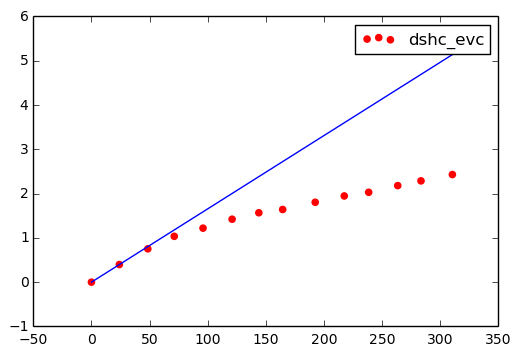

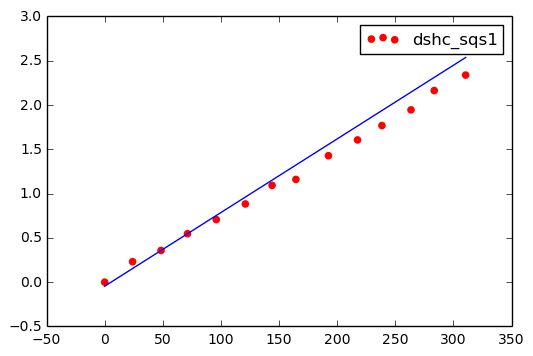

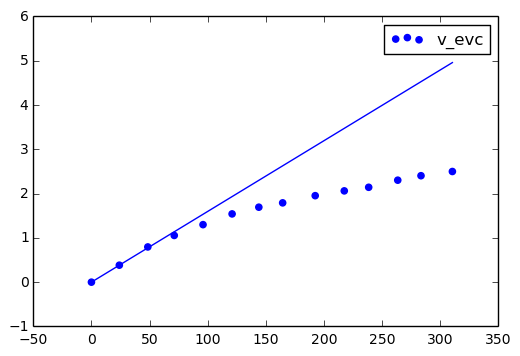

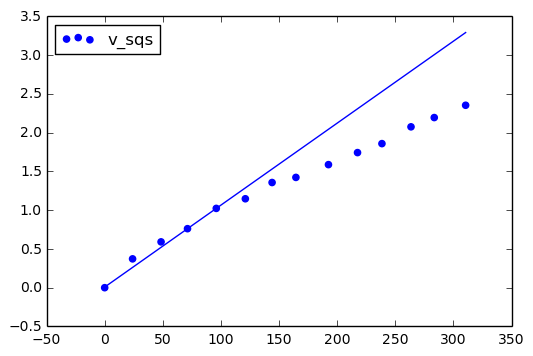

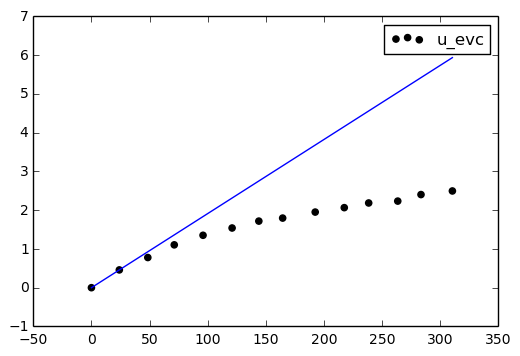

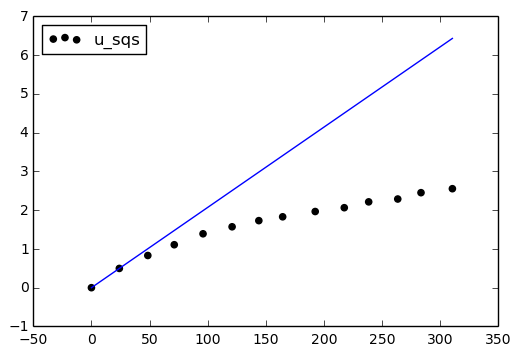

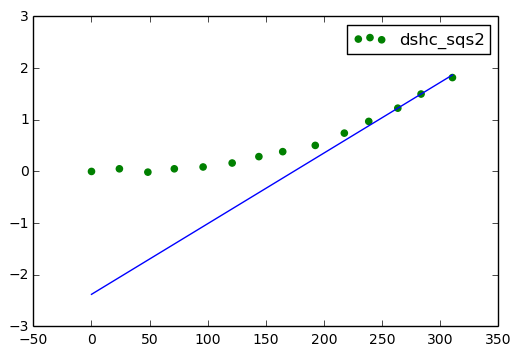

[41.487720057904717, 83.980241470505447, 43.873778744021145, 65.286309732059152, 36.431742672008461, 33.772856643302156, 48.260516176439126]


In [27]:
plt.figure(figsize=(6, 4))
slo=np.zeros((len(foo[0]),len(foo[0])))
w=[0,2,0,3,0,0,11]
double_tang=[]
growth_rate_tang=[]

#plot tangent for all strains
for d in range(1,len(foo)):
    plt.scatter(t, foo[d],color=c[d-1],label=labels[d])
    
    for i in range(len(foo[0])-1):
        slo[d][i]=((foo[d][i+1]-foo[d][i])/(t[i+1]-t[i]))
        plt.legend(loc='best')
        
    tang=slo[d][w[d-1]]*(np.array(t)-t[w[d-1]])+foo[d][w[d-1]]
    double_tang.append(np.log(2)/slo[d][w[d-1]])
    growth_rate_tang.append(slo[d][w[d-1]])
    plt.plot(t,tang)
    plt.show()
    
print double

In [28]:
#styles
sym=['v','D','x',"o","^",'+',"*"]
size=[50,30,60,40,50,70,80]
labeli=['$\Delta shc$_EVC',
 '$\Delta shc$_SQS1',
 'GT-V_EVC',
 'GT-V_SQS',
 'GT-U_EVC',
 'GT-U_SQS',
 '$\Delta shc$_SQS2']
c=['r','r','b','b','k','k','g']
ls=['--','-','--','-','--','-','-']
lines=[Line2D(range(10), range(10), linestyle='--', marker='v',color='r'),
        Line2D(range(10), range(10), linestyle='-', marker='D',color='r'),
        Line2D(range(10), range(10), linestyle='--', marker='x',mew=2,color='b'),
        Line2D(range(10), range(10), linestyle='-', marker='o',color='b'),
        Line2D(range(10), range(10), linestyle='--', marker='^',color='k'),
        Line2D(range(10), range(10), linestyle='-', marker='+',mew=2,color='k'),
        Line2D(range(10), range(10), linestyle='-', marker='*',color='g')]

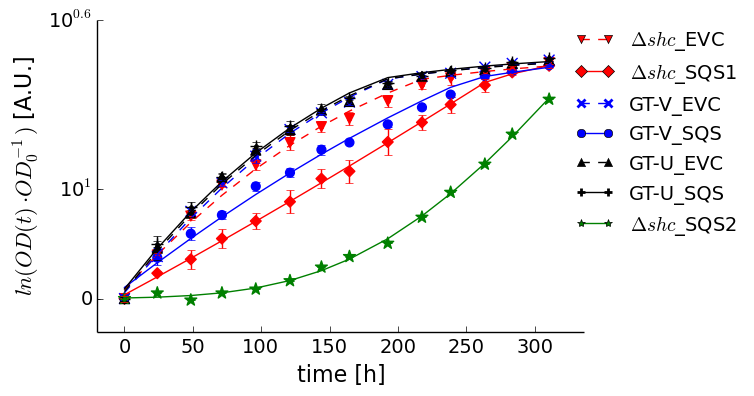

In [29]:
#final plot of all fitted growth rates and std
voffset=[-4,-3.5,-2.45,-4.2,-3.7,-4.5,0]
err_doub=[]

yscale('symlog')

ax = plt.subplot(111)


for d in range(1,len(foo)):
    params = optimize.leastsq(residuals,x0,args=(foo[d], t,voffset[d-1]))
    ax.scatter(t, foo[d],s=size[d-1],color=c[d-1],marker=sym[d-1])
    errorbar(t,foo[d],color=c[d-1],yerr=err.T[d-1],fmt='.')
    ax.plot(t, test_func(t, params[0],voffset[d-1]),color=c[d-1],linewidth=1,linestyle=ls[d-1],label=labels[d])
    err_doub.append(params[0][1]*exp(-exp((exp(1)*params[0][1]*(params[0][2]-t)/params[0][0]+1)+
                                       (exp(1)*params[0][1]*(params[0][2]-t)/params[0][0]+2)   ) ))

    
plt.xlabel('time [h]',fontsize=16)
plt.ylabel('$ln(OD(t) \cdot OD_{0}^{-1})$ [A.U.]',fontsize=16)
plt.tight_layout()
yticks([0,1,10**0.6],[0, '10$^{1}$' ,'10$^{0.6}$'],fontsize=14)
xticks(fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

xlim(-20,14*24)
ylim(-0.3,4)


legend(lines,labeli,bbox_to_anchor=(1.35,1.025),frameon=False,fontsize=14)

#savefig('growth_curve_all_averaged',bbox_inches='tight',dpi=1000)
plt.show()

In [30]:
#std and growth rates calculated with fit and tangent
a=np.round(growth_rate,4).tolist()
b=np.round(double,2).tolist()
c=np.round(growth_rate_tang,4).tolist()
d=np.round(double_tang,2).tolist()
print a
print b
print c
print d

df=pd.DataFrame([(['Growth Rate [$h^{-1}$] (modeled with Gompertz equation)']+a),
              (['Growth Rate [$h^{-1}$] (calculated with tangent)']+c),
              (['Doubling Time [$h$] (modeled with Gompertz equation)']+b),
              (['Doubling Time [$h$] (calculated with tangent)']+d)],columns=[['Method']+labeli][0]).set_index(['Method'])

    
df

[0.0167, 0.0083, 0.0158, 0.0106, 0.019, 0.0205, 0.0144]
[41.49, 83.98, 43.87, 65.29, 36.43, 33.77, 48.26]
[0.0165, 0.0083, 0.016, 0.0106, 0.0191, 0.0207, 0.0137]
[41.89, 83.36, 43.41, 65.53, 36.25, 33.46, 50.69]


,$\Delta shc$_EVC,$\Delta shc$_SQS1,GT-V_EVC,GT-V_SQS,GT-U_EVC,GT-U_SQS,$\Delta shc$_SQS2
Method,,,,,,,
Growth Rate [$h^{-1}$] (modeled with Gompertz equation),0.0167,0.0083,0.0158,0.0106,0.0190,0.0205,0.0144
Growth Rate [$h^{-1}$] (calculated with tangent),0.0165,0.0083,0.0160,0.0106,0.0191,0.0207,0.0137
Doubling Time [$h$] (modeled with Gompertz equation),41.4900,83.9800,43.8700,65.2900,36.4300,33.7700,48.2600
Doubling Time [$h$] (calculated with tangent),41.8900,83.3600,43.4100,65.5300,36.2500,33.4600,50.6900


In [31]:
#write to csv
import csv

with open('growth_rates', 'wb') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(['Experiment']+labeli)
    wr.writerow(['Growth Rate [$h^{-1}] (modeled with Gompertz equation)']+a)
    wr.writerow(['Growth Rate [$h^{-1}] (calculated with tangent)']+list(c))
    wr.writerow(['Doubling Time [$h^{-1}] (modeled with Gompertz equation)']+list(b))
    wr.writerow(['Doubling Time [$h^{-1}] (calculated with tangent)']+list(d))
    


# Statistics

In [32]:
mini=np.array(mimi)
mini=mini.T
for i in range(len(mini)):
    mini[i][0]=mini[i][0]/mini[i][0].min() 
odi=np.array(od)

In [33]:
#normality test for all samples
x=1
p_val_norm=[]

while x < len(mini):
    print x
    print stats.normaltest(mini[x][0])
    p_val_norm.append(stats.normaltest(mini[x][0]))
    x+=1
    

1
NormaltestResult(statistic=0.92070807111467357, pvalue=0.6310601882079)
2
NormaltestResult(statistic=1.0361309639152172, pvalue=0.59567177186949261)
3
NormaltestResult(statistic=0.99578136491282909, pvalue=0.6078113757174074)
4
NormaltestResult(statistic=2.5397109716246451, pvalue=0.28087220886470948)
5
NormaltestResult(statistic=3.4014566794110026, pvalue=0.18255051683172607)
6
NormaltestResult(statistic=2.6370131810222919, pvalue=0.26753454240114005)
7
NormaltestResult(statistic=1.5549711770583063, pvalue=0.45956008293579875)
8
NormaltestResult(statistic=1.1568115670897112, pvalue=0.56079167763099136)
9
NormaltestResult(statistic=1.1246412040936622, pvalue=0.56988505177281734)
10
NormaltestResult(statistic=1.5835270091577809, pvalue=0.45304514321005496)
11
NormaltestResult(statistic=1.4186179780845232, pvalue=0.4919840463948647)
12
NormaltestResult(statistic=1.7217197973815015, pvalue=0.42279836220082645)
13
NormaltestResult(statistic=0.94121370650616132, pvalue=0.62462309868479915

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [34]:
# Bartlett's test on heteroscedasticity within triplicates
x=1

p_var_triple=[]

while x < len(mini)-3:
    print x, x+1,x+2
    print stats.bartlett(mini[x][0],mini[x+1][0],mini[x+2][0])
    x+=3
    

1 2 3
BartlettResult(statistic=0.12600946066210383, pvalue=0.93893903218616859)
4 5 6
BartlettResult(statistic=0.23661744675025542, pvalue=0.8884217337162984)
7 8 9
BartlettResult(statistic=0.11735844086431201, pvalue=0.9430092187343424)
10 11 12
BartlettResult(statistic=0.01044903857499109, pvalue=0.99478910477667548)
13 14 15
BartlettResult(statistic=0.049904921367085707, pvalue=0.97535627869699548)
16 17 18
BartlettResult(statistic=0.014108120833293046, pvalue=0.99297076106915505)


In [35]:
# Friedman's test within triplicates
x=1

p_var_triple=[]

while x < len(mini):
    print x, x+1,x+2
    print stats.friedmanchisquare(mini[x][0],mini[x+1][0],mini[x+2][0])
    x+=3

1 2 3
FriedmanchisquareResult(statistic=14.0, pvalue=0.00091188196555451635)
4 5 6
FriedmanchisquareResult(statistic=19.076923076923055, pvalue=7.2027574113775665e-05)
7 8 9
FriedmanchisquareResult(statistic=14.307692307692298, pvalue=0.00078185117107817243)
10 11 12
FriedmanchisquareResult(statistic=1.0769230769230769, pvalue=0.58364547814357415)
13 14 15
FriedmanchisquareResult(statistic=5.9999999999999822, pvalue=0.049787068367864382)
16 17 18
FriedmanchisquareResult(statistic=12.923076923076923, pvalue=0.0015623901832581282)
19 20 21
FriedmanchisquareResult(statistic=nan, pvalue=nan)


/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:4934: RuntimeWarning: invalid value encountered in double_scalars
  chisq = (12.0 / (k*n*(k+1)) * ssbn - 3*n*(k+1)) / c


In [36]:
# post-hoc two sample related t-test
x=1

p_ano_triple=[]

while x < len(mini)-3:
    print x, x+1
    print stats.ttest_rel(mini[x][0],mini[x+1][0])
    print x, x+2
    print stats.ttest_rel(mini[x][0],mini[x+2][0])
    print x+1, x+2
    print stats.ttest_rel(mini[x+1][0],mini[x+2][0])
    x+=3
    

1 2
Ttest_relResult(statistic=array(-0.9628784401529358), pvalue=0.35317815774853456)
1 3
Ttest_relResult(statistic=array(3.687062657863218), pvalue=0.0027367360216801052)
2 3
Ttest_relResult(statistic=array(4.793225470161478), pvalue=0.00035108085493931274)
4 5
Ttest_relResult(statistic=array(5.555920467920894), pvalue=9.2911915720056618e-05)
4 6
Ttest_relResult(statistic=array(6.580365697000782), pvalue=1.768297872281976e-05)
5 6
Ttest_relResult(statistic=array(-3.551586905316144), pvalue=0.0035456204071671734)
7 8
Ttest_relResult(statistic=array(1.1057372622366535), pvalue=0.28888388401243864)
7 9
Ttest_relResult(statistic=array(3.4821497806572896), pvalue=0.0040503652838752022)
8 9
Ttest_relResult(statistic=array(3.2886115776980334), pvalue=0.0058750524643648291)
10 11
Ttest_relResult(statistic=array(0.2737655656243018), pvalue=0.78856623811992343)
10 12
Ttest_relResult(statistic=array(1.5791307411913422), pvalue=0.13832079731790478)
11 12
Ttest_relResult(statistic=array(1.77793975

In [37]:
odi=[odi[:,x]/odi[:,x][0] for x in range(len(odi[0]))] #normalize ods

In [38]:
# Bartlett's test on heteroscedasticity between evc and mutant
x=1

while x < len(odi)-1:
    print x, x+1
    print stats.bartlett(odi[x],odi[x+1])
    x+=2
    


1 2
BartlettResult(statistic=0.091559024830636992, pvalue=0.76220445623017286)
3 4
BartlettResult(statistic=0.48240557982133536, pvalue=0.4873347036334813)
5 6
BartlettResult(statistic=0.033501548029021333, pvalue=0.8547711205914188)


In [39]:
# Two sample related t test between evc and mutant
x=1

p_val_comp=[]

while x < len(odi)-1:
    print x,x+1
    print stats.ttest_rel(odi[x],odi[x+1])
    p_val_comp.append(stats.ttest_ind(odi[x],odi[x+1])[1])
    x+=2
    
p_val_comp

1 2
Ttest_relResult(statistic=array(7.519154358787606), pvalue=4.3784081236145167e-06)
3 4
Ttest_relResult(statistic=array(6.380030530013985), pvalue=2.4182473135888863e-05)
5 6
Ttest_relResult(statistic=array(-3.3779576082430536), pvalue=0.0049475182366116336)


[0.26460707694670216, 0.28226196252568947, 0.88068078065259392]

In [40]:
# Bartlett's test on heteroscedasticity within evcs and mutants, respectively
x=1

while x < 3:
    print x,x+2,x+4
    print stats.bartlett(odi[x],odi[x+2],odi[x+3])
    x+=1

1 3 5
BartlettResult(statistic=0.49620424237309901, pvalue=0.78028025606363682)
2 4 6
BartlettResult(statistic=0.57218991459426793, pvalue=0.75119128146635628)


In [41]:
# One way ANOVA within evcs and mutants, respectively
x=1

p_ano_within=[]
while x < 3:
    print x,x+2,x+4
    print stats.f_oneway(odi[x],odi[x+2],odi[x+3])
    x+=1

1 3 5
F_onewayResult(statistic=0.61673634757118267, pvalue=0.54488293028215951)
2 4 6
F_onewayResult(statistic=1.4106266758277186, pvalue=0.25616363419149446)
